In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

X,y = datasets.make_moons()

In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

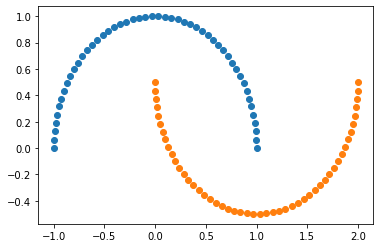

In [5]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [6]:
X,y = datasets.make_moons(noise=0.15,random_state=666)


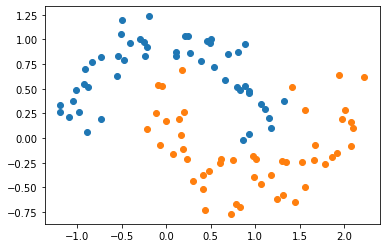

In [7]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])


### 使用多项式特征的SVM

In [8]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("standardScaler",StandardScaler()),
        ("linearSVC",LinearSVC(C=C))
    ])

In [21]:
poly_svc = PolynomialSVC(degree=3)

In [22]:
poly_svc.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('standardScaler', StandardScaler()),
                ('linearSVC', LinearSVC())])

In [23]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]

    y_predict = model.predict(X_new)
    zz=y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

<ipython-input-23-077fd7ed623f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


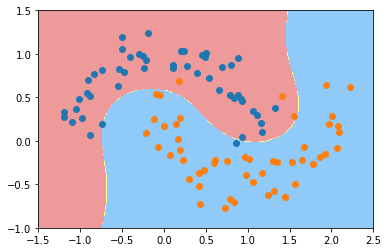

In [24]:
plot_decision_boundary(poly_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

### 使用多项式核函数的SVM

In [56]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree,C=10):
    return Pipeline([
        ("std_scaler",StandardScaler()),
        ("KernelSVC",SVC(kernel="rbf",degree=degree,C=C))
    ])

In [57]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)

In [58]:
poly_kernel_svc.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('KernelSVC', SVC(C=10))])

<ipython-input-23-077fd7ed623f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


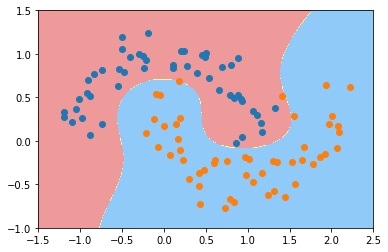

In [59]:
plot_decision_boundary(poly_kernel_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
